In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

In [22]:
M = 10
lr = 0.1
batch_size = 1024

methods = ["1", "2", "exact", "MC"]
bound = "seeger"

datasets = ["MUSH", "TTT", "SVMGUIDE", "HABER", "PHIS", "CODRNA", "ADULT"]
ns = [4874+1625, 574+192, 2471+618, 183+61, 6633+2211, 35721+11907, 19536+6512]
dims = [22, 9, 4, 2, 68, 8, 123]

results = {}
for d in datasets:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/latest/{d}/{m}/{bound}")
        path = next(load_dir.rglob(f"**/M={M}/**/lr={lr}/batch-size={batch_size}/**/err-b.npy"))
        results[d][m] = np.load(path, allow_pickle=True).item()

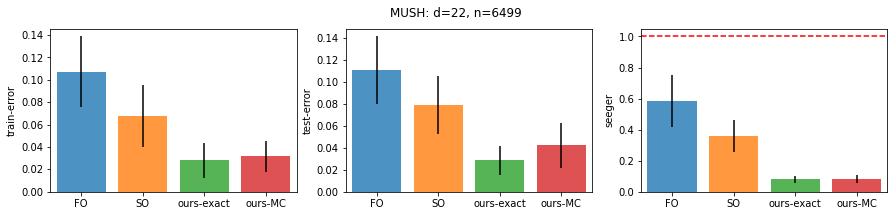

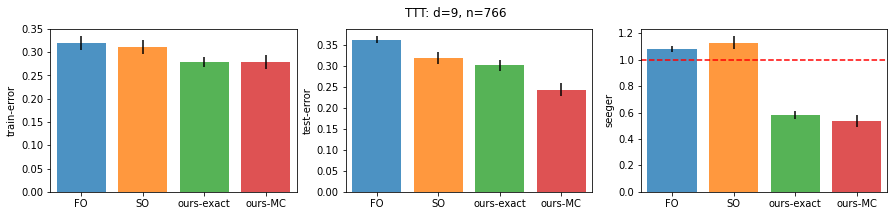

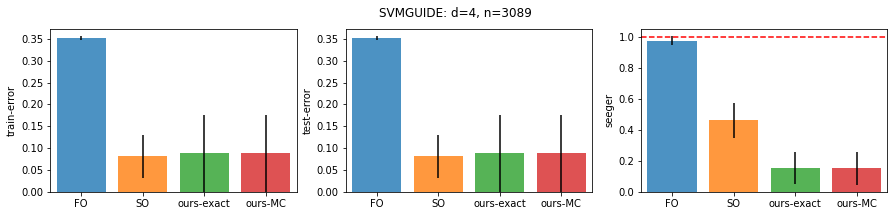

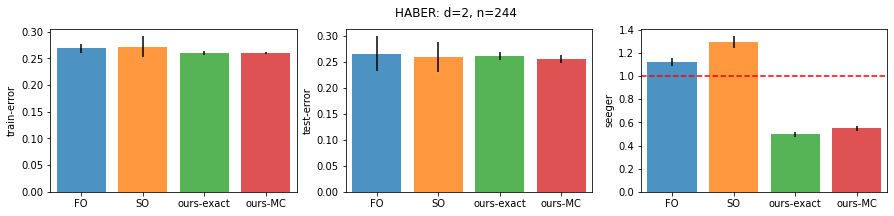

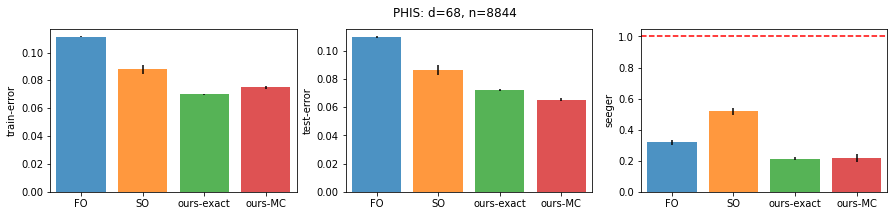

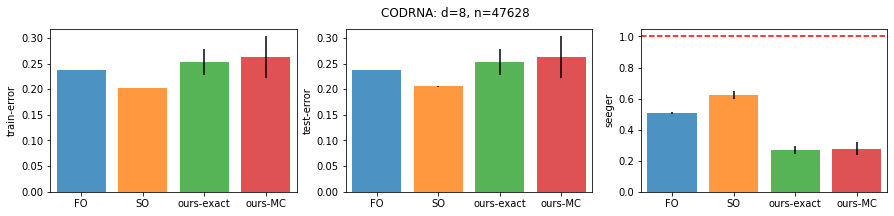

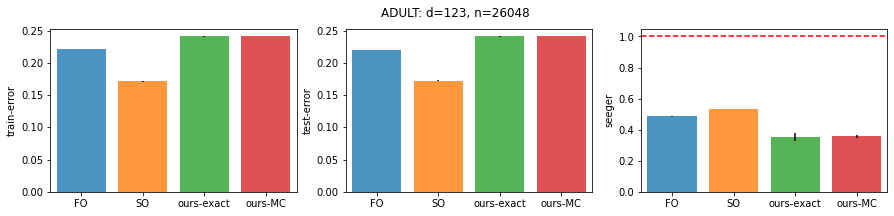

In [46]:
for d, s, n in zip(datasets, dims, ns):
    
    plt.figure(figsize=(15,3))
    for j, y in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)
        for i, m in enumerate(methods):
            plt.bar(i, results[d][m][y][0], yerr=results[d][m][y][1], label=m, alpha=0.8)
            plt.ylabel(y)
        
        if y == bound:
            plt.plot([-0.5, 3.5], [1, 1], linestyle='dashed', c="r")
        
        ax.set_xticks(range(4))
        ax.set_xticklabels(["FO", "SO", "ours-exact", "ours-MC"])
        plt.xlim(-0.5, 3.5)
    plt.suptitle(f"{d}: d={s}, n={n}")
    plt.savefig(f"{d}.pdf", bbox_inches="tight")

Text(0, 0.5, 'Seeger')

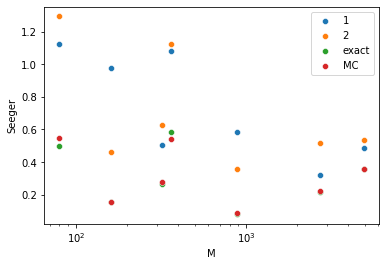

In [43]:
for m in methods:
    sn.scatterplot(x=[d*M*4 for d in dims], y=[results[d][m][bound][0] for d in datasets], label=m)
plt.xscale("log")
plt.legend()
plt.xlabel("M")
plt.ylabel("Seeger")

Text(0, 0.5, 'Seeger')

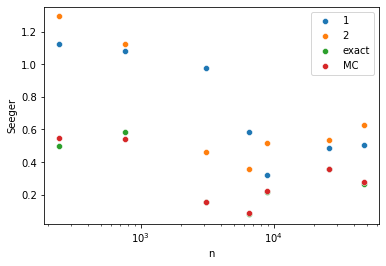

In [47]:
for m in methods:
    sn.scatterplot(x=ns, y=[results[d][m][bound][0] for d in datasets], label=m)
plt.xscale("log")
plt.legend()
plt.xlabel("n")
plt.ylabel("Seeger")